# Playground

This is a safe space where failure is allowed. Eventually, success will come!

In [29]:
# Imports
%load_ext autoreload
%autoreload 2
import numpy as np
from queue import Queue
from track_time import track_time
from maze import create_maze, save_maze, load_maze, draw_maze

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
l = [1, 2, 3, 4, 5]
i = 3
for k in range(i-1, -1, -1):
    print(l[k])

3
2
1


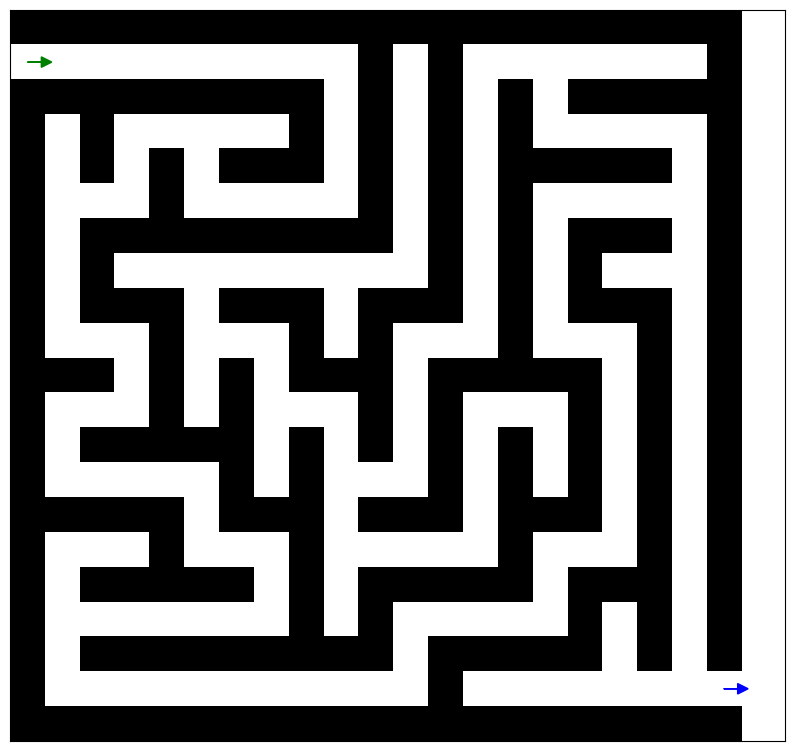

In [36]:
# d = 10
# maze10 = create_maze(10)
# save_maze(maze10, dir='.', filename='test')
maze10 = load_maze('test.json')
draw_maze(maze10)

In [5]:
def find_path(maze):
    # BFS algorithm to find the shortest path
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    start = (1, 1)
    end = (maze.shape[0]-2, maze.shape[1]-2)
    visited = np.zeros_like(maze, dtype=bool)
    visited[start] = True
    queue = Queue()
    queue.put((start, []))
    while not queue.empty():
        (node, path) = queue.get()
        for dx, dy in directions:
            next_node = (node[0]+dx, node[1]+dy)
            if (next_node == end):
                return path + [next_node]
            if (next_node[0] >= 0 and next_node[1] >= 0 and 
                next_node[0] < maze.shape[0] and next_node[1] < maze.shape[1] and 
                maze[next_node] == 0 and not visited[next_node]):
                visited[next_node] = True
                queue.put((next_node, path + [next_node]))

In [2]:
@eval_perf
def add(a, b):
    return a+b, a*b

In [3]:
add(10, 20)

{'executing_time_sec': 0.0,
 'peak_memory_usage': 0,
 'path': 30,
 'num_dead_ends': 200}

In [45]:
def find_path(maze):
    # BFS algorithm to find the shortest path
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    start = (1, 1)
    end = (maze.shape[0]-2, maze.shape[1]-2)
    visited = np.zeros_like(maze, dtype=bool)
    visited[start] = True
    queue = Queue()
    queue.put((start, []))
    while not queue.empty():
        (node, path) = queue.get()
        for dx, dy in directions:
            next_node = (node[0]+dx, node[1]+dy)
            if (next_node == end):
                return path + [next_node]
            if (next_node[0] >= 0 and next_node[1] >= 0 and 
                next_node[0] < maze.shape[0] and next_node[1] < maze.shape[1] and 
                maze[next_node] == 0 and not visited[next_node]):
                visited[next_node] = True
                queue.put((next_node, path + [next_node]))

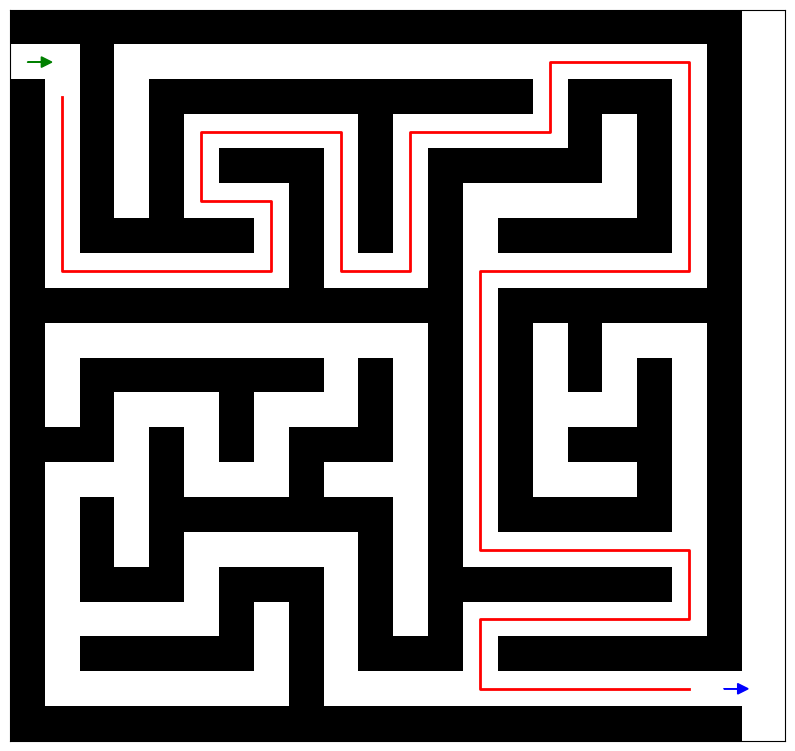

In [47]:
dim = int(input("Enter the dimension of the maze: "))
maze = create_maze(dim)
path = find_path(maze)
draw_maze(maze, path)